In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from tensorflow import keras
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

In [0]:
kyle = np.load('drive/My Drive/kyles.npy')
tyler = np.load('drive/My Drive/tyler.npy')
#cage = np.load('drive/My Drive/cages.npy')

In [0]:
## encoder
e1 = keras.layers.Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(175,175,3))
#e1.trainable=False

e2 = keras.layers.MaxPooling2D((2,2), padding='same')
#e2.trainable=False

e3 = keras.layers.Conv2D(64,(3,3), activation='relu', padding='same')
#e3.trainable=False

e4 = keras.layers.MaxPooling2D((2,2), padding='same')
#e4.trainable=False

e5 = keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')
#e5.trainable=False

## latent face
core = keras.layers.MaxPooling2D((2,2), padding='same')
#core.trainable=False

e6 = keras.layers.Flatten()
e7 = keras.layers.Dense(200)

##decoder
d1 = keras.layers.Conv2D(128,(3,3),activation='relu', padding='same', input_shape=(22, 22, 64))
d2 = keras.layers.UpSampling2D((2,2))
d3 = keras.layers.Conv2D(64,(3,3), activation='relu', padding='same')
d4 = keras.layers.UpSampling2D((2,2))
d5 = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')
d6 = keras.layers.UpSampling2D((2,2))

out = keras.layers.Conv2D(3,(2,2), activation='sigmoid', padding='valid')


## add layers to sequential model
# model = keras.Sequential()
# model.add(e1)
# model.add(e2)
# model.add(e3)
# model.add(e4)
# model.add(e5)
# model.add(core)


# model.add(d1)
# model.add(d2)
# model.add(d3)
# model.add(d4)
# model.add(d5)
# model.add(d6)
# model.add(out)

def encoder():
  model = keras.Sequential()
  model.add(e1)
  model.add(e2)
  model.add(e3)
  model.add(e4)
  model.add(e5)
  model.add(core)
  model.add(e6)
  model.add(e7)
  return model

def decoder():
  model = keras.Sequential()
  model.add(Dense(30976, input_shape=(200,)))
  model.add(Reshape((22,22,64)))
  model.add(d1)
  model.add(d2)
  model.add(d3)
  model.add(d4)
  model.add(d5)
  model.add(d6)
  model.add(out)
  return model

at the end of the encoder: model.add(flatten()), model.add(Dense(200))
and then add model.reshape((22,22,64)) at the beginning of the decoder

In [0]:
encoder = encoder()
decoder = decoder()

model = keras.Sequential()
model.add(encoder)
model.add(decoder)

In [71]:
encoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 175, 175, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 88, 88, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 44, 44, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 61952)            

In [72]:
decoder.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30976)             6226176   
_________________________________________________________________
reshape_3 (Reshape)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 44, 44, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 44, 44, 64)        73792     
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 88, 88, 32)      

In [73]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 200)               12483848  
_________________________________________________________________
sequential_10 (Sequential)   (None, 175, 175, 3)       6392675   
Total params: 18,876,523
Trainable params: 18,876,523
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mse')

In [78]:
model.fit(tyler,tyler,epochs=100,batch_size=100)


Epoch 1/100
1789/1789 [==============================] - 10s 6ms/sample - loss: 0.0021
Epoch 2/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0021
Epoch 3/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0020
Epoch 4/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0021
Epoch 5/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0020
Epoch 6/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0019
Epoch 7/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0018
Epoch 8/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0018
Epoch 9/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0018
Epoch 10/100
 200/1789 [==>...........................] - ETA: 8s - loss: 0.0017

KeyboardInterrupt: ignored

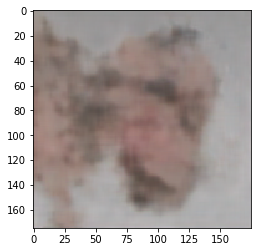

In [80]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(model.predict(np.array([kyle[80]]))[0],cv2.COLOR_BGR2RGB))
plt.show()
##try w tyler

In [0]:
encoder.save_weights('drive/My Drive/tyler_encoder3.h5')

In [0]:
decoder.save_weights('drive/My Drive/tyler_decoder3.h5')

In [0]:
encoder.load_weights('drive/My Drive/tyler_encoder3.h5')

In [0]:
decoder.load_weights('drive/My Drive/tyler_decoder3.h5')

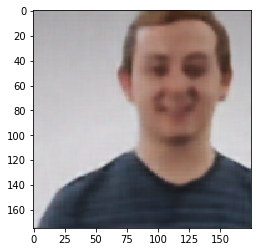

In [85]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([tyler[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
kyle_encoded = encoder.predict(kyle)

In [87]:
decoder.compile(optimizer='adam', loss='mse')
decoder.fit(kyle_encoded, kyle, epochs=100, batch_size=100)

Epoch 1/100
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.0107
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0044
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0036
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0032
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0030
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0028
Epoch 7/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0026
Epoch 8/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0025
Epoch 9/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0023
Epoch 10/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0022
Epoch 11/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0021
Epoch 12/100
1000/1000 [============================

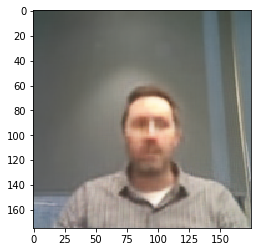

In [88]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([kyle[100]])))[0],cv2.COLOR_BGR2RGB))
plt.show()


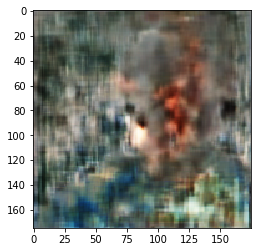

In [89]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([tyler[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()
